<a href="https://colab.research.google.com/github/priyankachahal/student_research/blob/master/ecg_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, LSTM
from keras.models import Sequential


In [0]:
def get_input_file():
    dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ecg-classification/dataset/ecg_dataset.csv', header=None, engine='python')
    # dataset.fillna(0, inplace=True)
    # drop rows with NaN from the data frame
    dataset = dataset.dropna()
    dataset = dataset.sort_values(dataset.columns[1])
    # 
    cols = list(dataset.columns.values)
    cols.pop(cols.index(dataset.columns[0]))
    dataset = dataset[cols + [dataset.columns[0]]]
    dataset.columns = ['col ' + str(i) for i in range(0, len(dataset.columns))]
    dataset.drop(dataset.columns[[0]], axis=1, inplace=True)
    return dataset
input_dataset = get_input_file()
input_data = input_dataset.values

In [55]:
input_dataset.head(5)
input_dataset.shape

(2168, 301)

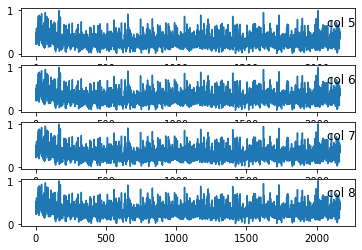

In [50]:
# specify columns to plot
values = input_dataset.values
groups = [5, 6, 7, 8]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(input_dataset.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [56]:
features = 300
timestep = 1
n_train = 1500
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1500, 1, 301) (1500,) (668, 1, 301) (668,)


In [57]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
print(model.summary())





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                70400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 70,451
Trainable params: 70,451
Non-trainable params: 0
_________________________________________________________________
None


In [67]:
history = model.fit(train_X, train_y, epochs=1000, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 1500 samples, validate on 668 samples
Epoch 1/1000
 - 0s - loss: 13.1671 - val_loss: 15.7366
Epoch 2/1000
 - 0s - loss: 13.1487 - val_loss: 15.7095
Epoch 3/1000
 - 0s - loss: 13.1490 - val_loss: 15.7297
Epoch 4/1000
 - 0s - loss: 13.1304 - val_loss: 15.7069
Epoch 5/1000
 - 0s - loss: 13.1357 - val_loss: 15.6916
Epoch 6/1000
 - 0s - loss: 13.1145 - val_loss: 15.6956
Epoch 7/1000
 - 0s - loss: 13.1090 - val_loss: 15.6833
Epoch 8/1000
 - 0s - loss: 13.0991 - val_loss: 15.6719
Epoch 9/1000
 - 0s - loss: 13.0975 - val_loss: 15.6840
Epoch 10/1000
 - 0s - loss: 13.0800 - val_loss: 15.6590
Epoch 11/1000
 - 0s - loss: 13.0647 - val_loss: 15.6650
Epoch 12/1000
 - 0s - loss: 13.0482 - val_loss: 15.6539
Epoch 13/1000
 - 0s - loss: 13.0285 - val_loss: 15.6343
Epoch 14/1000
 - 0s - loss: 13.0110 - val_loss: 15.6377
Epoch 15/1000
 - 0s - loss: 12.9981 - val_loss: 15.6304
Epoch 16/1000
 - 0s - loss: 12.9981 - val_loss: 15.6185
Epoch 17/1000
 - 0s - loss: 12.9952 - val_loss: 15.6457
Epoch 18/1

In [0]:
results = model.predict(test_X)

In [61]:
results.shape

(668, 1)

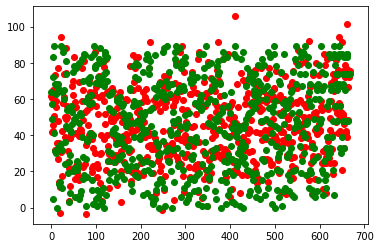

In [69]:
results.shape
plt.scatter(range(668), results, c='r');
plt.scatter(range(668), test_y, c='g');
plt.show()

In [0]:
results[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [0]:
y_test[:5]

array([63., 19., 80., 58., 89.])

<function matplotlib.pyplot.show>

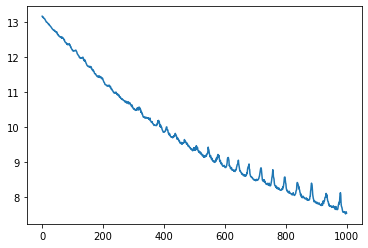

In [70]:
plt.plot(history.history['loss'])
plt.show